In [1]:
import requests
import json
from urllib.parse import urlencode
from bs4 import BeautifulSoup
import re
import datetime
from datetime import datetime
import dateparser
import psycopg2
import smtplib

In [2]:
# Чтение текущей даты
current_time_str = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f"Привет! Текущая дата - {current_time_str}")

Привет! Текущая дата - 2024-08-20 10:49:18


In [3]:
cookies = {
    '_ym_uid': '1545027567707528589',
    '_ym_d': '1719303718',
    '_gcl_au': '1.1.1793393708.1719303719',
    '_ga': 'GA1.1.255704567.1719303719',
    'tb_favourites_hash': '171930371832733292',
    'cc_cookie': '{"categories":["necessary","analytics","targeting"],"level":["necessary","analytics","targeting"],"revision":0,"data":null,"rfc_cookie":false,"consent_date":"2024-06-25T08:22:22.588Z","consent_uuid":"0b05ba09-2875-4dc8-b667-50ab3b395a27","last_consent_update":"2024-06-25T08:22:22.588Z"}',
    'sbjs_migrations': '1418474375998%3D1',
    'sbjs_first_add': 'fd%3D2024-08-09%2010%3A24%3A14%7C%7C%7Cep%3Dhttps%3A%2F%2Fexkavator.ru%2Fmain%2Fnews%3Futm_source%3Dmain_page%26utm_medium%3Dmenu%26utm_campaign%3Dnews%7C%7C%7Crf%3Dhttps%3A%2F%2Fexkavator.ru%2Fmain%2Fnews%3Futm_source%3Dmain_page%26utm_medium%3Dmenu%26utm_campaign%3Dnews%26__cf_chl_tk%3DOlmPOphRNJNTsQM5UmeUiodI7gf3gTQsIIY7yGge1yw-1723188245-0.0.1.1-4884',
    'sbjs_first': 'typ%3Dutm%7C%7C%7Csrc%3Dmain_page%7C%7C%7Cmdm%3Dmenu%7C%7C%7Ccmp%3Dnews%7C%7C%7Ccnt%3D%28none%29%7C%7C%7Ctrm%3D%28none%29',
    'sbjs_current': 'typ%3Dorganic%7C%7C%7Csrc%3Dgoogle%7C%7C%7Cmdm%3Dorganic%7C%7C%7Ccmp%3D%28none%29%7C%7C%7Ccnt%3D%28none%29%7C%7C%7Ctrm%3D%28none%29',
    'sbjs_current_add': 'fd%3D2024-08-15%2011%3A43%3A41%7C%7C%7Cep%3Dhttps%3A%2F%2Fexkavator.ru%2Fexcapedia%2Ftechnic%2Frm-terextl155%7C%7C%7Crf%3Dhttps%3A%2F%2Fwww.google.com%2F',
    '_ym_isad': '1',
    'cf_clearance': 'Cu2r3oS41.cUwAkfIPdF00B5J19.tOgDLPxpo6OBW74-1724138566-1.2.1.1-4dZFIe8RTOdY8BNWAq0izZ.WDtVrIY3UmwVlf7ASIgNOdaG0D3Yom8geEBBqTPolkTj2Jh.x_2XT9fQtO82sQmLxb2oPVuxIW1hXJwLE2q05HOZpCQP9GY5mg.LPsC56YTR2DvCsGXdlC30gVGDjEErVpPiy6Zo.57sAEQS7s9pf5.EsNUG3BbQyXYS44I4gcMj6jpurE5aOx27Sso1eLMndYNYulpxN00vpdddnhPC.GZ7AjhUdNwZBlKOfuG3U6xjtaYE7O4FbYxsTCwMma5XzvZYrozpY98oStUZ2NDIpGHKlBjwS5Ow8.8sP2XQT3O.618vdASy0rxTb8flawbWOJUGrwxjrHly9vKMH_7jC3IU.DixARtKaCjom9.dJM251E0yD1ytpek1ieqGjBx77I_CS6hhMvAQu3IPDGWM',
    '_ym_visorc': 'w',
    'v1_referrer_callibri': 'https%3A//exkavator.ru/trade/search/TradeFlag/1/NoPrice/1/UseFlag/new/%3F__cf_chl_tk%3Dywv4CxOO9x6O2gXc2YHjDxwDzZ7tiXPAz0yUwVnvldA-1724138566-0.0.1.1-6335',
    'sbjs_udata': 'vst%3D17%7C%7C%7Cuip%3D%28none%29%7C%7C%7Cuag%3DMozilla%2F5.0%20%28Windows%20NT%2010.0%3B%20Win64%3B%20x64%29%20AppleWebKit%2F537.36%20%28KHTML%2C%20like%20Gecko%29%20Chrome%2F127.0.0.0%20Safari%2F537.36',
    'sessionExpirationDate': '1724140383241',
    'exkavator_session': 'a%3A5%3A%7Bs%3A10%3A%22session_id%22%3Bs%3A32%3A%227316e2f6180d605def4e7a30d5b0ee12%22%3Bs%3A10%3A%22ip_address%22%3Bs%3A15%3A%22178.127.184.159%22%3Bs%3A10%3A%22user_agent%22%3Bs%3A111%3A%22Mozilla%2F5.0+%28Windows+NT+10.0%3B+Win64%3B+x64%29+AppleWebKit%2F537.36+%28KHTML%2C+like+Gecko%29+Chrome%2F127.0.0.0+Safari%2F537.36%22%3Bs%3A13%3A%22last_activity%22%3Bi%3A1724139062%3Bs%3A9%3A%22user_data%22%3Bs%3A0%3A%22%22%3B%7D4f434a2fa306e7aa142415740f7b6b22',
    '_ga_16VD85X6Z6': 'GS1.1.1724138567.11.1.1724139063.60.0.0',
}

headers = {
    'accept': 'text/css,*/*;q=0.1',
    'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7,be-BY;q=0.6,be;q=0.5',
    'cache-control': 'no-cache',
    # 'cookie': '_ym_uid=1545027567707528589; _ym_d=1719303718; _gcl_au=1.1.1793393708.1719303719; _ga=GA1.1.255704567.1719303719; tb_favourites_hash=171930371832733292; cc_cookie={"categories":["necessary","analytics","targeting"],"level":["necessary","analytics","targeting"],"revision":0,"data":null,"rfc_cookie":false,"consent_date":"2024-06-25T08:22:22.588Z","consent_uuid":"0b05ba09-2875-4dc8-b667-50ab3b395a27","last_consent_update":"2024-06-25T08:22:22.588Z"}; sbjs_migrations=1418474375998%3D1; sbjs_first_add=fd%3D2024-08-09%2010%3A24%3A14%7C%7C%7Cep%3Dhttps%3A%2F%2Fexkavator.ru%2Fmain%2Fnews%3Futm_source%3Dmain_page%26utm_medium%3Dmenu%26utm_campaign%3Dnews%7C%7C%7Crf%3Dhttps%3A%2F%2Fexkavator.ru%2Fmain%2Fnews%3Futm_source%3Dmain_page%26utm_medium%3Dmenu%26utm_campaign%3Dnews%26__cf_chl_tk%3DOlmPOphRNJNTsQM5UmeUiodI7gf3gTQsIIY7yGge1yw-1723188245-0.0.1.1-4884; sbjs_first=typ%3Dutm%7C%7C%7Csrc%3Dmain_page%7C%7C%7Cmdm%3Dmenu%7C%7C%7Ccmp%3Dnews%7C%7C%7Ccnt%3D%28none%29%7C%7C%7Ctrm%3D%28none%29; sbjs_current=typ%3Dorganic%7C%7C%7Csrc%3Dgoogle%7C%7C%7Cmdm%3Dorganic%7C%7C%7Ccmp%3D%28none%29%7C%7C%7Ccnt%3D%28none%29%7C%7C%7Ctrm%3D%28none%29; sbjs_current_add=fd%3D2024-08-15%2011%3A43%3A41%7C%7C%7Cep%3Dhttps%3A%2F%2Fexkavator.ru%2Fexcapedia%2Ftechnic%2Frm-terextl155%7C%7C%7Crf%3Dhttps%3A%2F%2Fwww.google.com%2F; _ym_isad=1; cf_clearance=Cu2r3oS41.cUwAkfIPdF00B5J19.tOgDLPxpo6OBW74-1724138566-1.2.1.1-4dZFIe8RTOdY8BNWAq0izZ.WDtVrIY3UmwVlf7ASIgNOdaG0D3Yom8geEBBqTPolkTj2Jh.x_2XT9fQtO82sQmLxb2oPVuxIW1hXJwLE2q05HOZpCQP9GY5mg.LPsC56YTR2DvCsGXdlC30gVGDjEErVpPiy6Zo.57sAEQS7s9pf5.EsNUG3BbQyXYS44I4gcMj6jpurE5aOx27Sso1eLMndYNYulpxN00vpdddnhPC.GZ7AjhUdNwZBlKOfuG3U6xjtaYE7O4FbYxsTCwMma5XzvZYrozpY98oStUZ2NDIpGHKlBjwS5Ow8.8sP2XQT3O.618vdASy0rxTb8flawbWOJUGrwxjrHly9vKMH_7jC3IU.DixARtKaCjom9.dJM251E0yD1ytpek1ieqGjBx77I_CS6hhMvAQu3IPDGWM; _ym_visorc=w; v1_referrer_callibri=https%3A//exkavator.ru/trade/search/TradeFlag/1/NoPrice/1/UseFlag/new/%3F__cf_chl_tk%3Dywv4CxOO9x6O2gXc2YHjDxwDzZ7tiXPAz0yUwVnvldA-1724138566-0.0.1.1-6335; sbjs_udata=vst%3D17%7C%7C%7Cuip%3D%28none%29%7C%7C%7Cuag%3DMozilla%2F5.0%20%28Windows%20NT%2010.0%3B%20Win64%3B%20x64%29%20AppleWebKit%2F537.36%20%28KHTML%2C%20like%20Gecko%29%20Chrome%2F127.0.0.0%20Safari%2F537.36; sessionExpirationDate=1724140383241; exkavator_session=a%3A5%3A%7Bs%3A10%3A%22session_id%22%3Bs%3A32%3A%227316e2f6180d605def4e7a30d5b0ee12%22%3Bs%3A10%3A%22ip_address%22%3Bs%3A15%3A%22178.127.184.159%22%3Bs%3A10%3A%22user_agent%22%3Bs%3A111%3A%22Mozilla%2F5.0+%28Windows+NT+10.0%3B+Win64%3B+x64%29+AppleWebKit%2F537.36+%28KHTML%2C+like+Gecko%29+Chrome%2F127.0.0.0+Safari%2F537.36%22%3Bs%3A13%3A%22last_activity%22%3Bi%3A1724139062%3Bs%3A9%3A%22user_data%22%3Bs%3A0%3A%22%22%3B%7D4f434a2fa306e7aa142415740f7b6b22; _ga_16VD85X6Z6=GS1.1.1724138567.11.1.1724139063.60.0.0',
    'pragma': 'no-cache',
    'priority': 'u=0',
    'referer': 'https://exkavator.ru/',
    'sec-ch-ua': '"Not)A;Brand";v="99", "Google Chrome";v="127", "Chromium";v="127"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'style',
    'sec-fetch-mode': 'no-cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36',
}

In [4]:
url_page = 'https://exkavator.ru/trade/search/TradeFlag/1/NoPrice/1/UseFlag/new/'
response_page = requests.get(url_page, headers=headers, cookies=cookies)
page = response_page.text
soup = BeautifulSoup(page, 'lxml')

<!DOCTYPE html>
<!--[if lt IE 7 ]><html class="ie ie6" lang="ru"> <![endif]--><!--[if IE 7 ]><html class="ie ie7" lang="ru"> <![endif]--><!--[if IE 8 ]><html class="ie ie8" lang="ru"> <![endif]--><!--[if (gte IE 9)|!(IE)]><!--><html lang="ru"> <!--<![endif]-->
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="Pragma" http-equiv="Cache-Control"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="Продажа новой специальной техники. 12835 объявлений о продаже спецтехники без пробега. Цены на новую спецтехнику" name="Description"/>
<meta content="noindex, follow" name="robots"/>
<script type="application/ld+json">{"@context":"https://schema.org","@graph":[{"@type":"BreadcrumbList","itemListElement":[{"@type":"ListItem","position":1,"name":"Продажа","item":"https://exkavator.ru/trade/"}]}]}</script>
<base href="https://exkavator.ru/trade/"/>
<link href="/images/_main2017/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link 
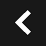
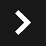

In [42]:
print(soup)

In [110]:
names = soup.find_all("span", class_="title-tech")
prices = soup.find_all("span", class_="price")
types = soup.find_all("span", class_="nw") 
sellers = soup.find_all("span", class_="company-name")
descriptions = soup.find_all("span", class_="desc")
dates = soup.find_all("span", class_="update-line", style="bottom: 8px;")
infos = soup.find_all("div", class_="tech-info lot-click")
urls = soup.find_all("a", class_="link link-is-online")

In [126]:
number = 0
for name, price, type, seller, description, date, info, url in zip(names, prices, types, sellers, descriptions, dates, infos, urls):
    # разбивка info на тип, год и локацию
    parts = info.text.split(", ")
    category = parts[0]
    year = parts[1]
    location = parts[2]
    # дата
    if date.text == 'Обновлено сегодня':
        date = current_time_str
    else:
        date = dateparser.parse(date.text)
        #date_str = date.strftime('%Y-%m-%d %H:%M:%S')
    # подгонка и подрезка
    price = re.sub(r'\sруб.', '', price.text).strip().replace(' ', '')
    category = category.strip()
    year = re.sub(r'\sгод', '', year).strip().replace(' ', '')
    name = name.text.strip()
    url = url.get("href")
    id = re.search(r'lot/(\d+)/', url)
    id = id.group(1)
    url = 'https://exkavator.ru' + url
    

    print(f""" {number}
id - {id}
имя - {name}
цена - {price}
тип - {category}
продавец - {seller.text}
описание - {description.text}
дата - {date}
год выпуска - {year}
место - {location}
url - {url}
------------
""")
    number +=1

 0
id - 875975
имя - Lonking CDM853GN
цена - 7603673
тип - Автокраны
продавец - ГК Автодоркомплект
описание - Только продажа техники! АРЕНДЫ НЕТ! Гарантия 12 месяцев или 2000 м/ч.
ЦЕНА С НДС!
Характеристики:
- Эксплуатационная масса, кг: 16200 ±300
- Номин
дата - 2024-08-20 10:49:18
год выпуска - 2023
место - Москва 
url - https://exkavator.ru/trade/lot/875975/2023-xcmg_xs143/
------------

 1
id - 856253
имя - Welld QTZ 160 (7016)
цена - 20000000
тип - Колесные экскаваторы
продавец - Рекорд - строительные решения
описание - 
Предлагаем купить новый башенный кран WELLD QTZ 160 (7016) - 10 тонн вместе с услугами сервисного центра WELLD. Под заказ.
- Гарантия 12 месяцев
- Д
дата - 2024-08-20 10:49:18
год выпуска - 2023
место - Москва 
url - https://exkavator.ru/trade/lot/856253/2023-raskat_rv-13_dd/
------------

 2
id - 102216
имя - HBXG TY160-3
цена - 13332440
тип - Башенные краны
продавец - ГК Автодоркомплект
описание - Только продажа техники! АРЕНДЫ НЕТ!
Бульдозер Shehwa TY 160-3, 20